# **Caminata aleatoria de pearson**

# El problema de la Caminata Aleatoria

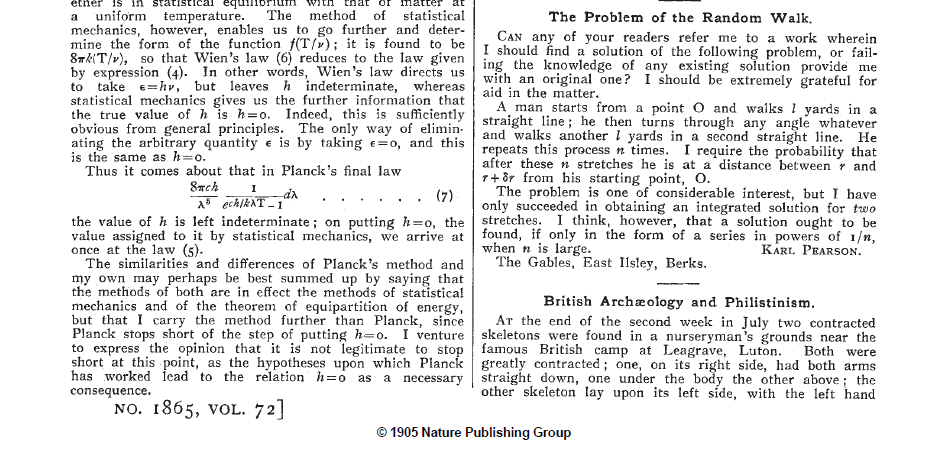

# Respuesta de Rayleigh

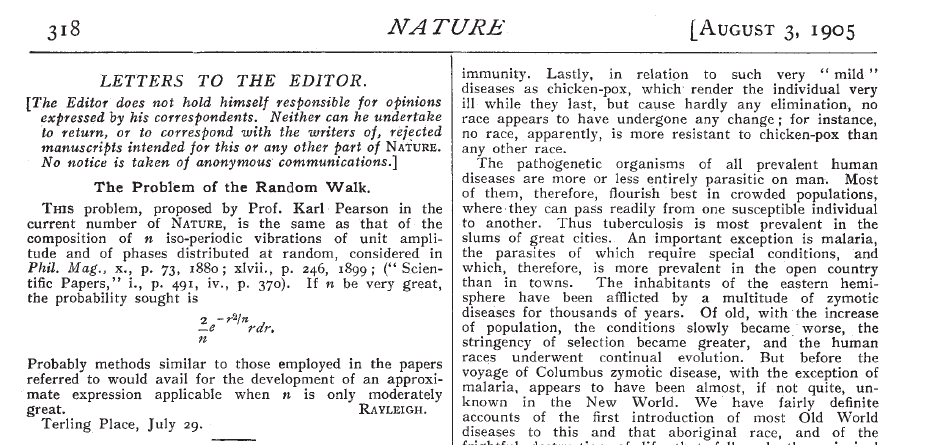

# **Solución:**

Sea 
$$ \overrightarrow{R}_n = \overrightarrow{r}_1 +  \overrightarrow{r}_2 + ... +  \overrightarrow{r}_n $$

donde los componentes de $ \overrightarrow{r}_i $
\begin{equation}
\overrightarrow{r}_x = l cos(\theta_i)\\
\overrightarrow{r}_y = l sen(\theta_i)  
\end{equation}

y

\begin{equation}
\overrightarrow{R}_x = l \sum_{i=1}^{n} cos(\theta_i)\\
\overrightarrow{R}_y = l \sum_{i=1}^{n} sen(\theta_i)  
\end{equation}

$$R_n = |R_n| = \sqrt{\overrightarrow{R}_x + \overrightarrow{R}_y} $$


In [4]:
library('ggplot2')
library('dplyr')
library('tidyr')

In [5]:
PearsonRW <- function(nsteps, run, l){
  # inicialización
  Rx <- c()
  Ry <- c()
  R2 <- c()
  R <- c()
  rx <- c()
  ry <- c()
  rx[1] <- 0
  ry[1] <- 0
  Rx[1] <- 0
  Ry[1] <- 0
  R[1] <- 0
  R2[1] <- 0
  # ciclo
  for(i in 2:(nsteps+1)){
    thetha <- runif(1, 0, 2*pi)
    rx[i] <-  l*cos(thetha) 
    ry[i] <-  l*sin(thetha)
    Rx[i] <- Rx[i-1] + rx[i]
    Ry[i] <- Ry[i-1] + ry[i]
    R2[i] <- (Rx[i]^2 + Ry[i]^2)
    R[i] <- sqrt(R2[i])
  }
  data <- data.frame('run'=run, 'step'=0:(nsteps),'rx'=rx, 'ry'=ry,'Rx'=Rx, 'Ry'=Ry, 'R'=R, 'R2'=R2) %>%
  mutate('n_square'= sqrt(step), 'n_entre_2'=step/2)

  return(data)
}


In [6]:
PearsonRandomWalk <- function(nsteps, runs, l=1){
  for(i in 1:runs){
    if(i == 1){
      df_1 <- PearsonRW(nsteps, run=i, l=1)
    }else{
      df_i <- PearsonRW(nsteps, run=i, l=1)
      df_1 <- rbind(df_1, df_i)
    }
  }
  return(df_1)
}




In [7]:
# valores
nsteps <- 8000
runs <- 1000

# simulación
data <- PearsonRandomWalk(nsteps, runs, l=1)
head(data)

,run,step,rx,ry,Rx,Ry,R,R2,n_square,n_entre_2
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1,1,0.4389900,-0.8984920,0.4389900,-0.898492,1.000000,1.000000,1.000000,0.5
3,1,2,0.6961254,-0.7179202,1.1351154,-1.616412,1.975165,3.901275,1.414214,1.0
4,1,3,-0.5842647,-0.8115632,0.5508507,-2.427975,2.489679,6.198501,1.732051,1.5
5,1,4,0.5843024,0.8115360,1.1351531,-1.616439,1.975209,3.901449,2.000000,2.0
6,1,5,-0.9820358,-0.1886947,0.1531173,-1.805134,1.811616,3.281954,2.236068,2.5


# Simulación de $R_n$

\begin{equation}
  f_R(r)  =  \frac{2r}{n} \exp \{- \frac{r^2}{n} \}  \ \ \ , r>0
\end{equation}

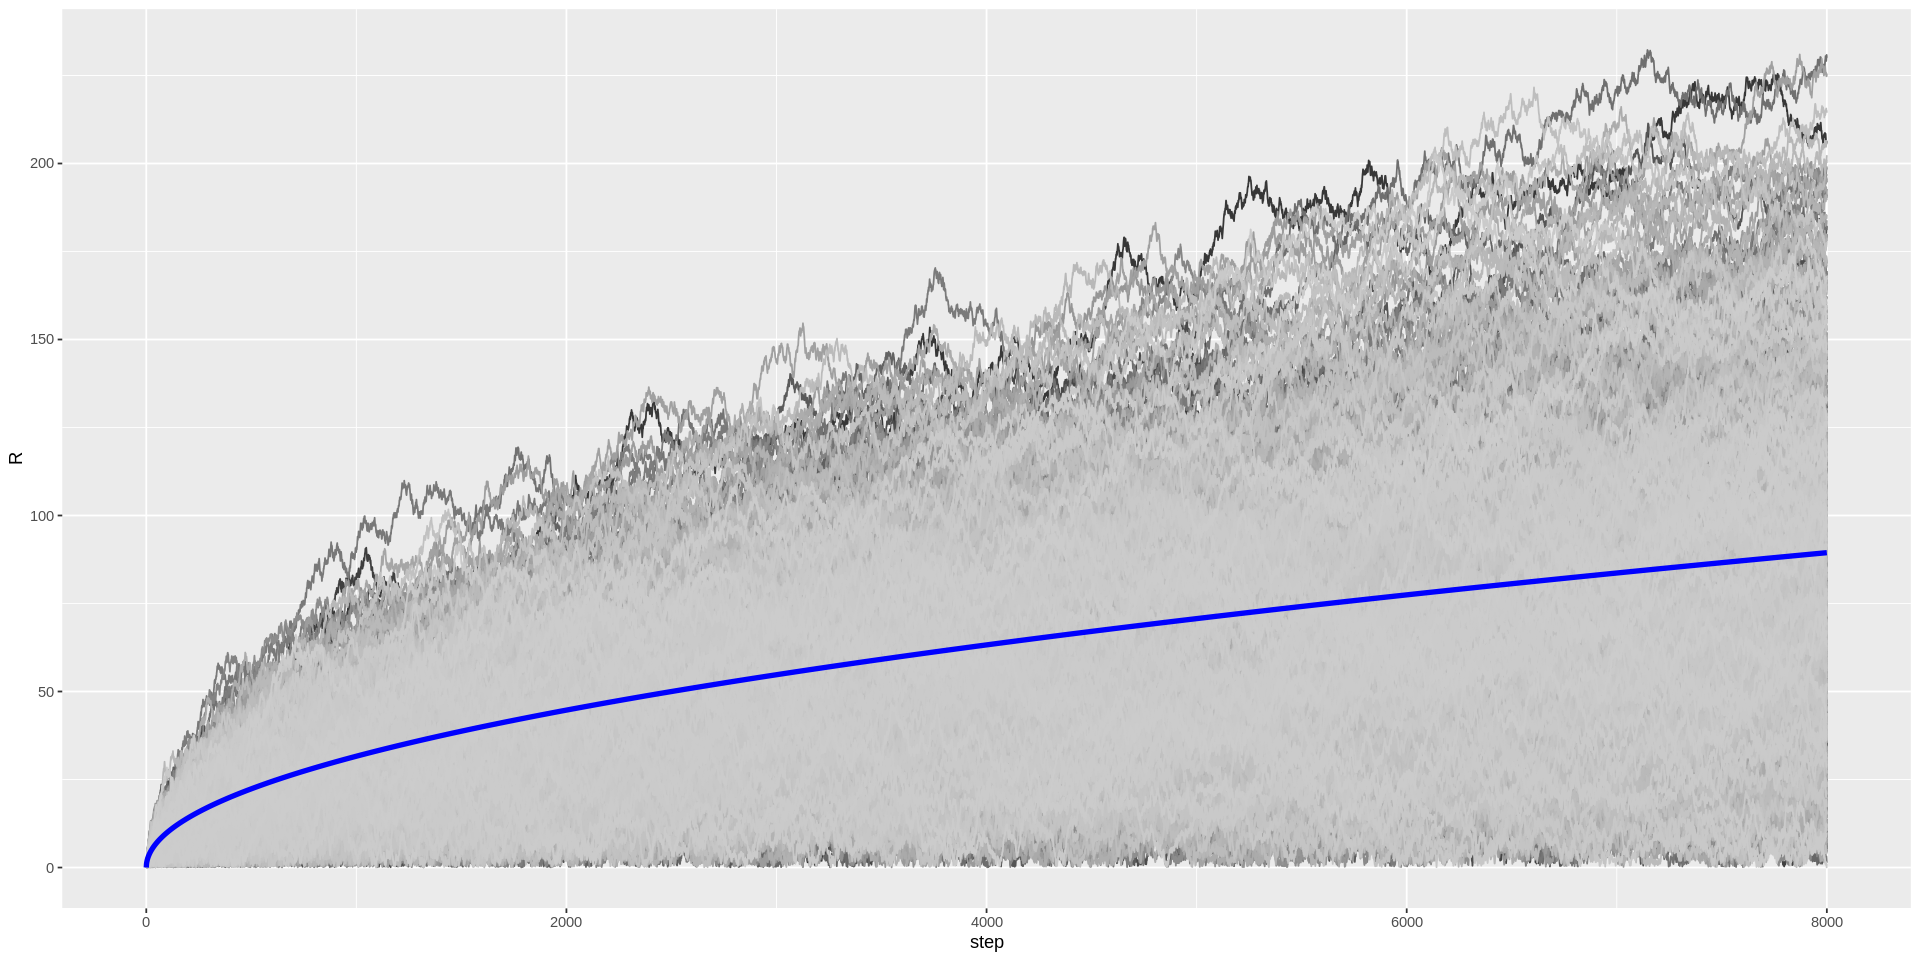

In [8]:
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(data, aes(x=step, y=R, color=as.character(run))) +
  geom_line() +
  scale_color_grey() +
  geom_line(data, mapping=aes(x=step, y=n_square), size=1.5, color='blue') +
  theme(legend.position = "none") 
p1

# Distribución de $R_n$

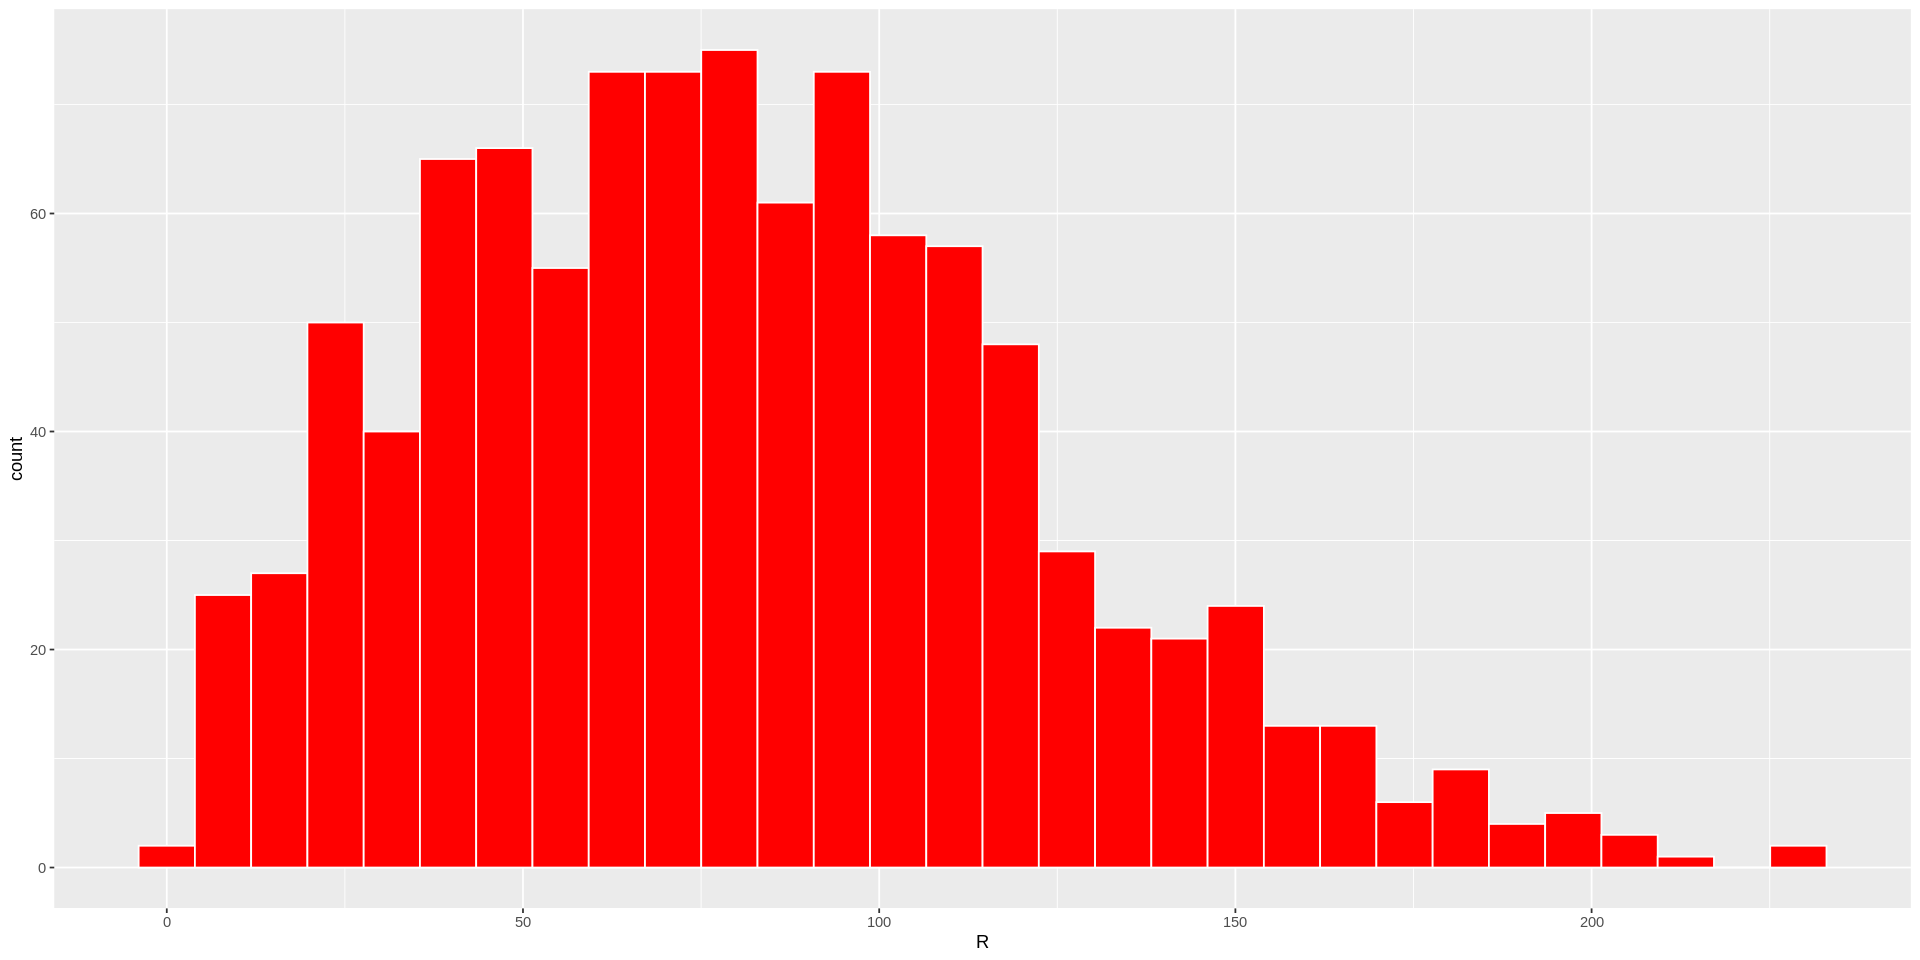

In [9]:
p2 <- ggplot(data %>% filter(step==nsteps), aes(x=R)) +
  geom_histogram(bins=30, color='white', fill='red')
p2

# Distribución de $\overrightarrow{R}_x$ 

$$\overrightarrow{R}_x \sim N(0, n/2)$$

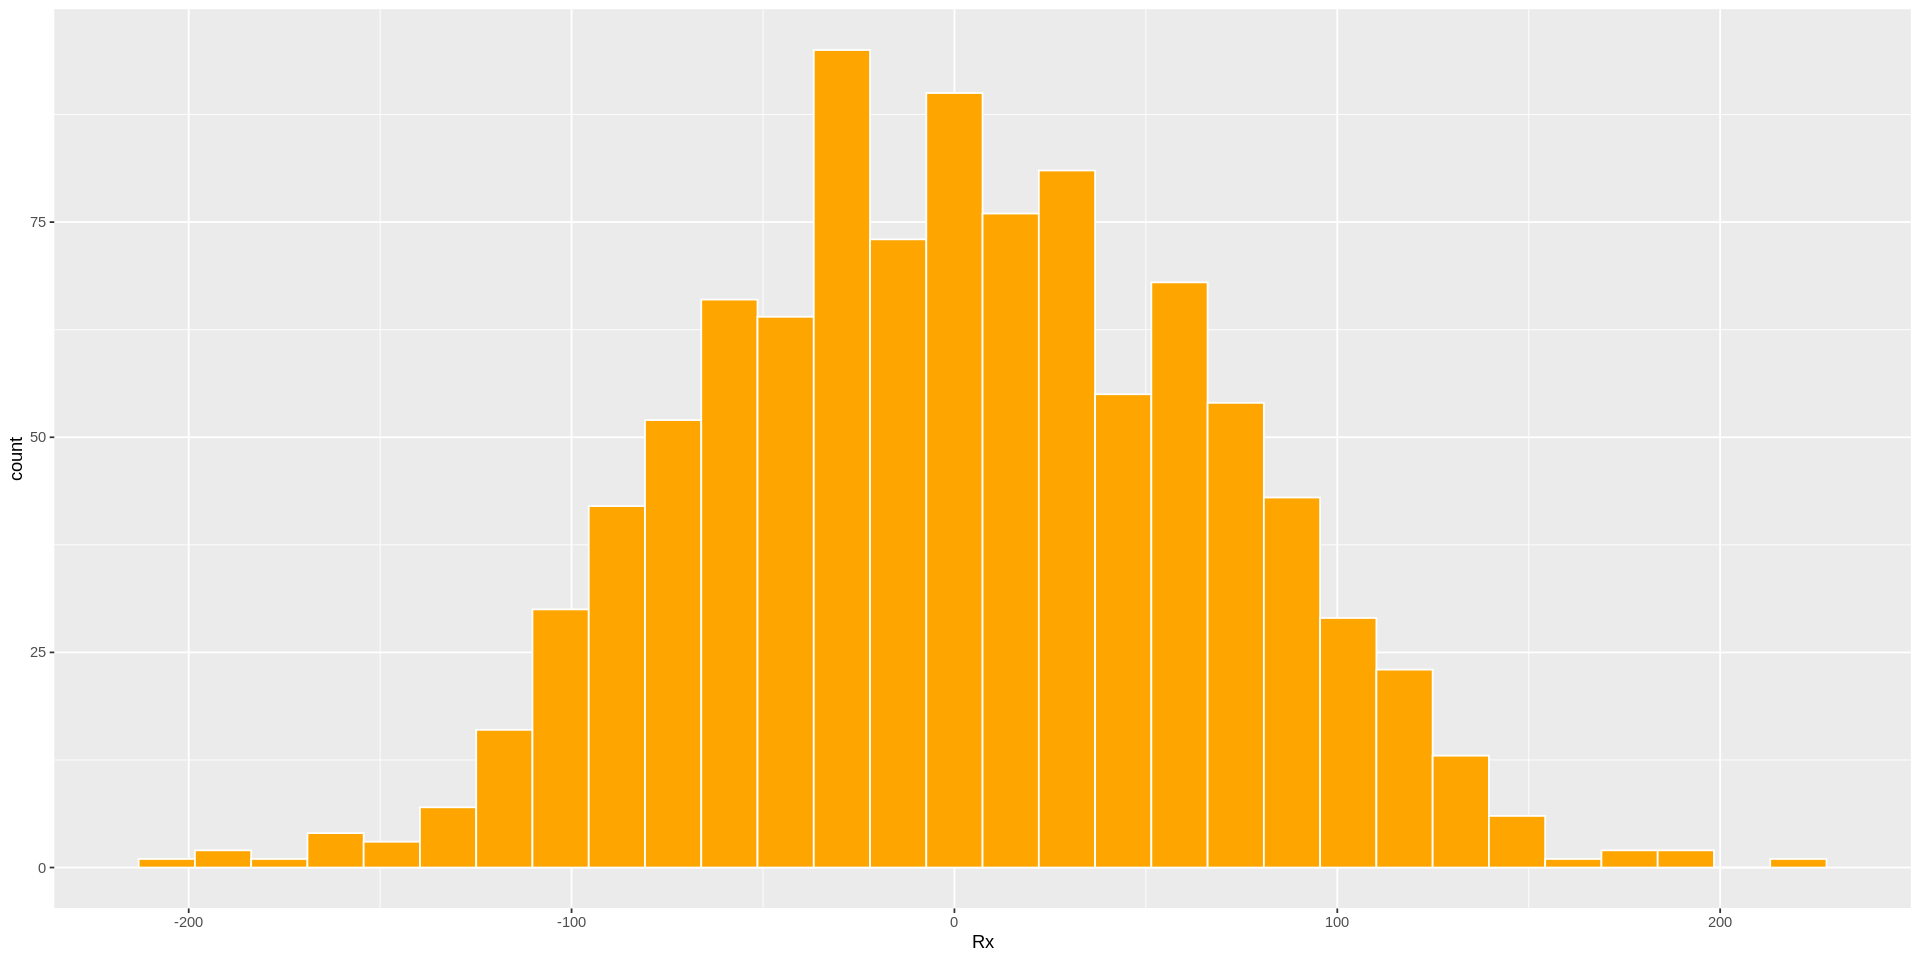

In [10]:
p3 <- ggplot(data %>% filter(step==nsteps), aes(x=Rx)) +
  geom_histogram(bins=30, color='white', fill='orange')
p3

# Distribución de $\overrightarrow{R}_y$

$$\overrightarrow{R}_y \sim N(0, n/2)$$

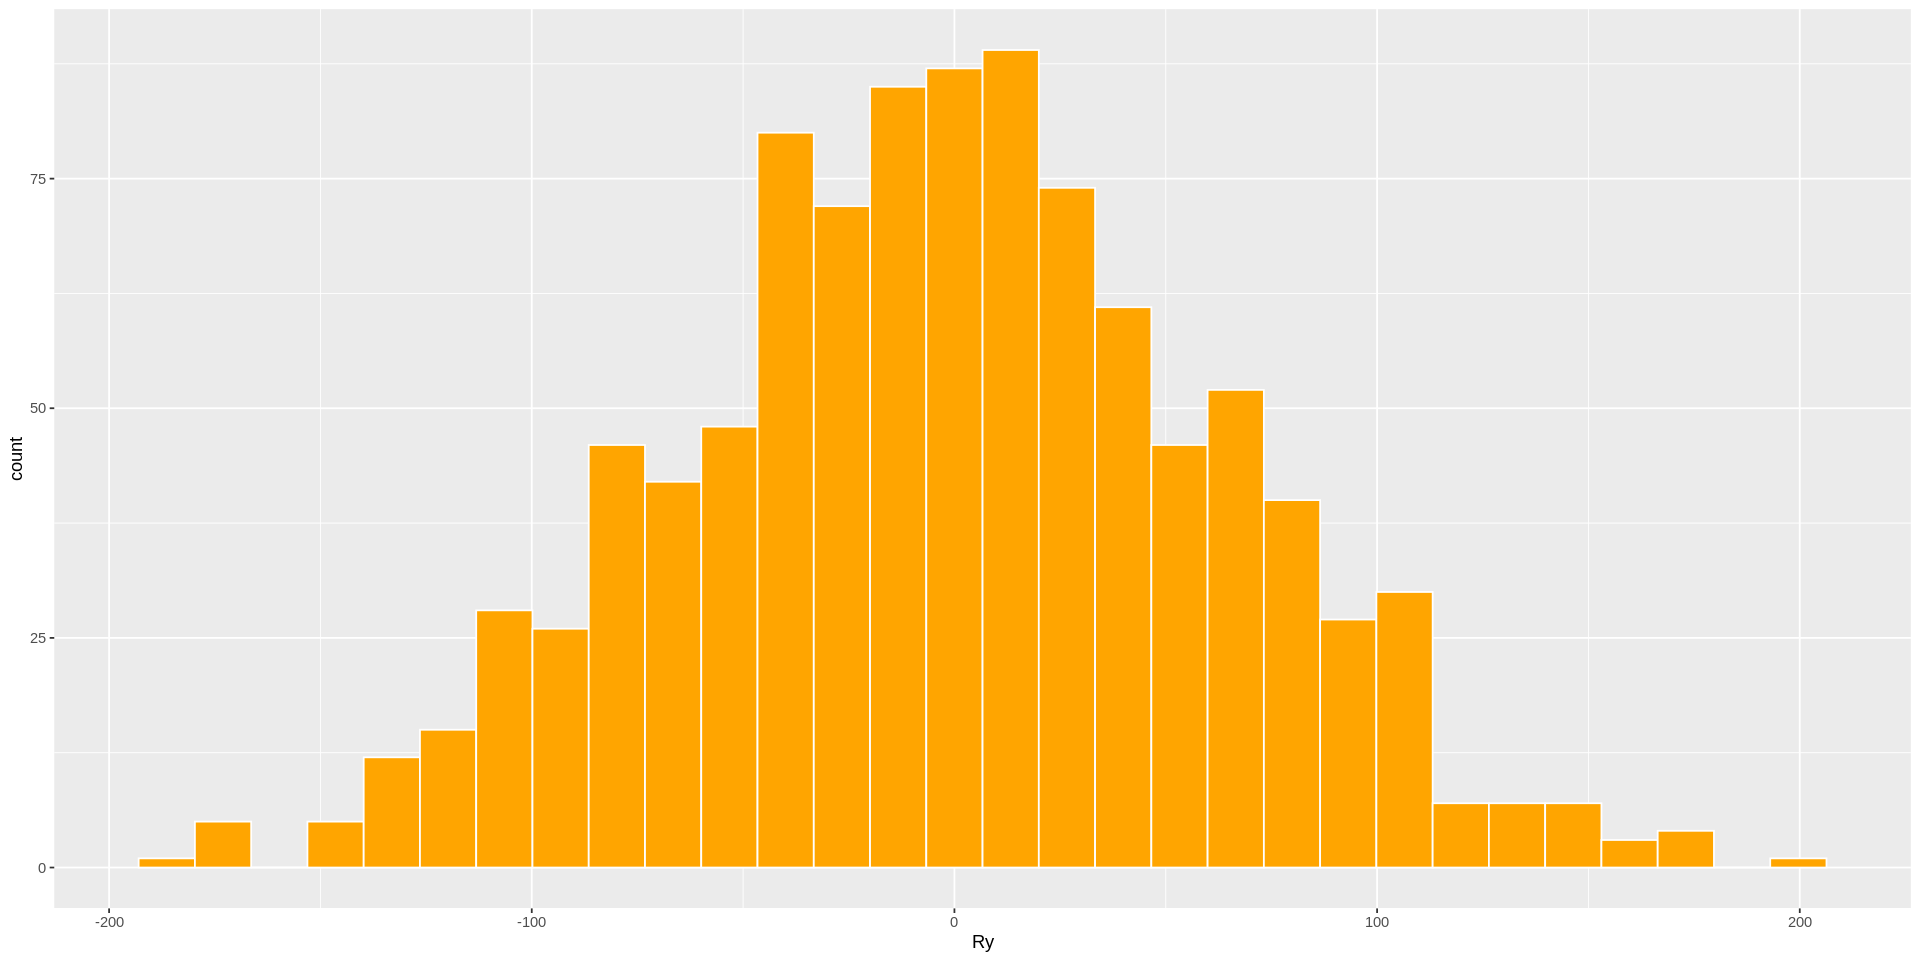

In [11]:
p3 <- ggplot(data %>% filter(step==nsteps), aes(x=Ry)) +
  geom_histogram(bins=30, color='white', fill='orange')
p3

# Distribución de $R^2$

Sea $W= R_n^2 = \overrightarrow{R}_x^2 + \overrightarrow{R}_y^2$, entonces du distribución viene dada por

\begin{equation}
f_W(w) = \frac{1}{n} \exp\{- \frac{w}{n}\}, \ \ \ w>0
\end{equation}

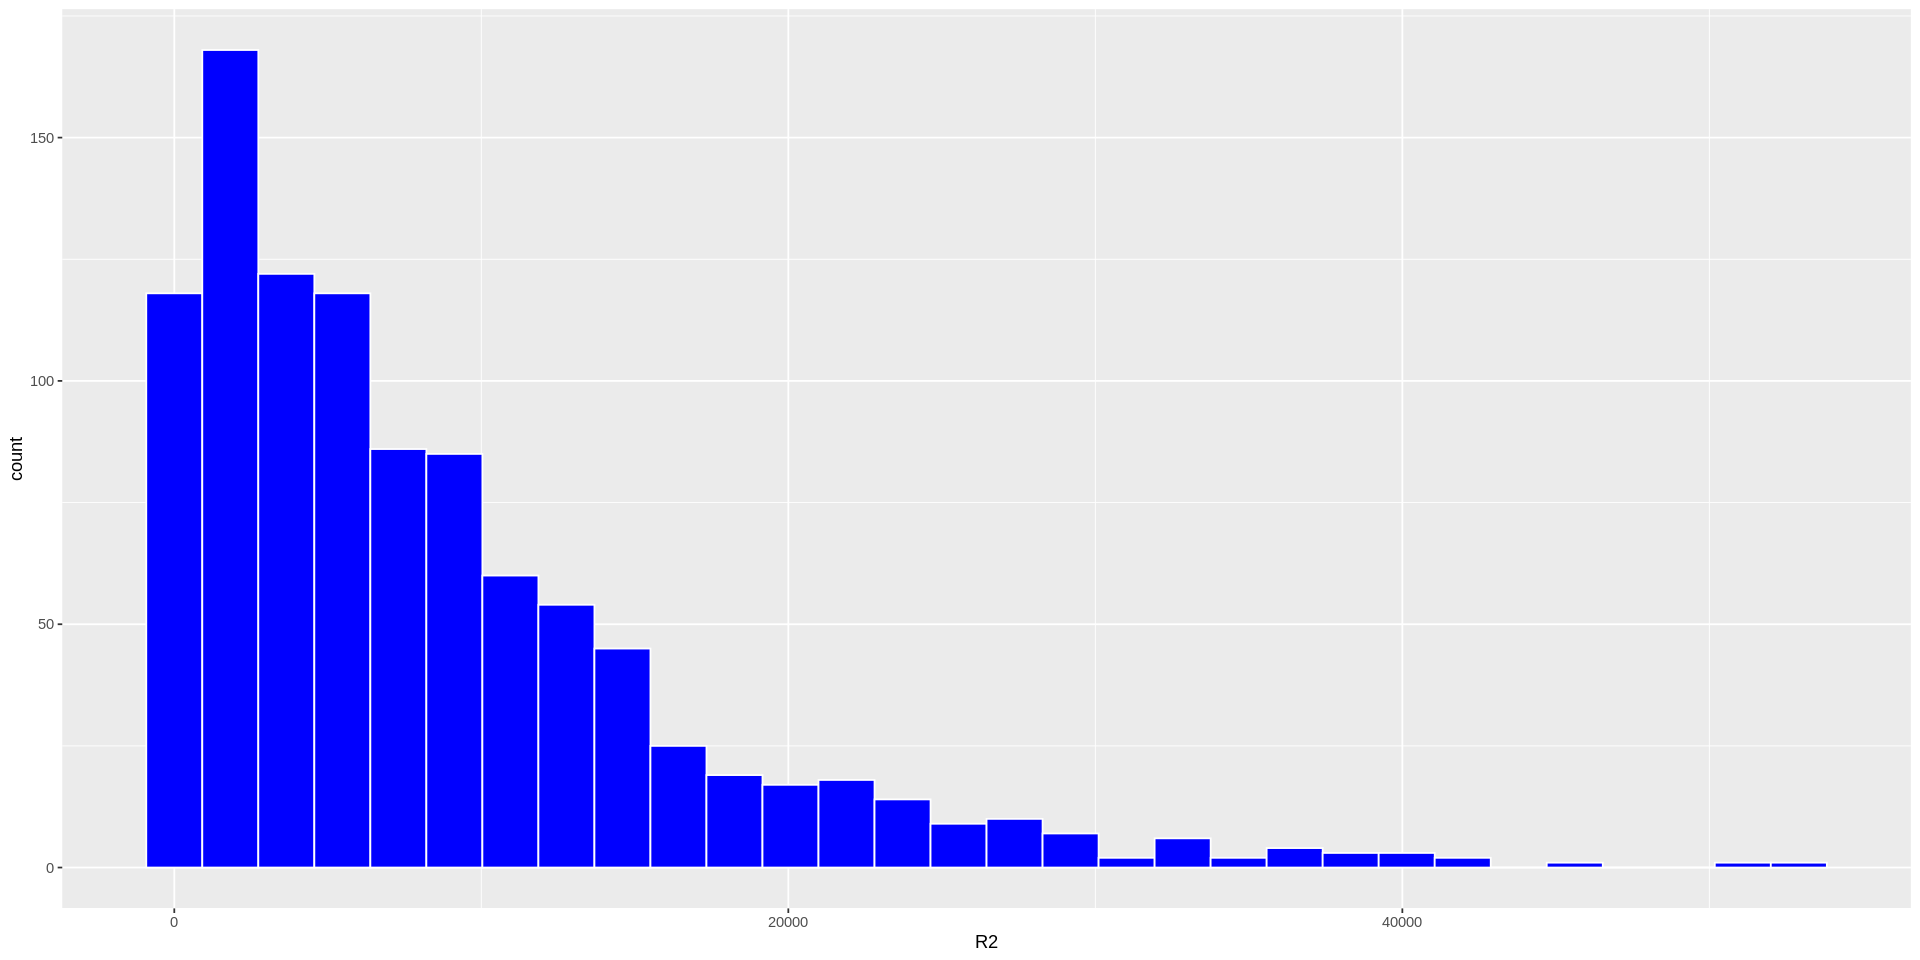

In [12]:
p3 <- ggplot(data %>% filter(step==nsteps), aes(x=R2)) +
  geom_histogram(bins=30, fill='blue', color='white')
p3

# Trayectoria del Caminante 

In [15]:
df <- data%>%filter(run == 1)

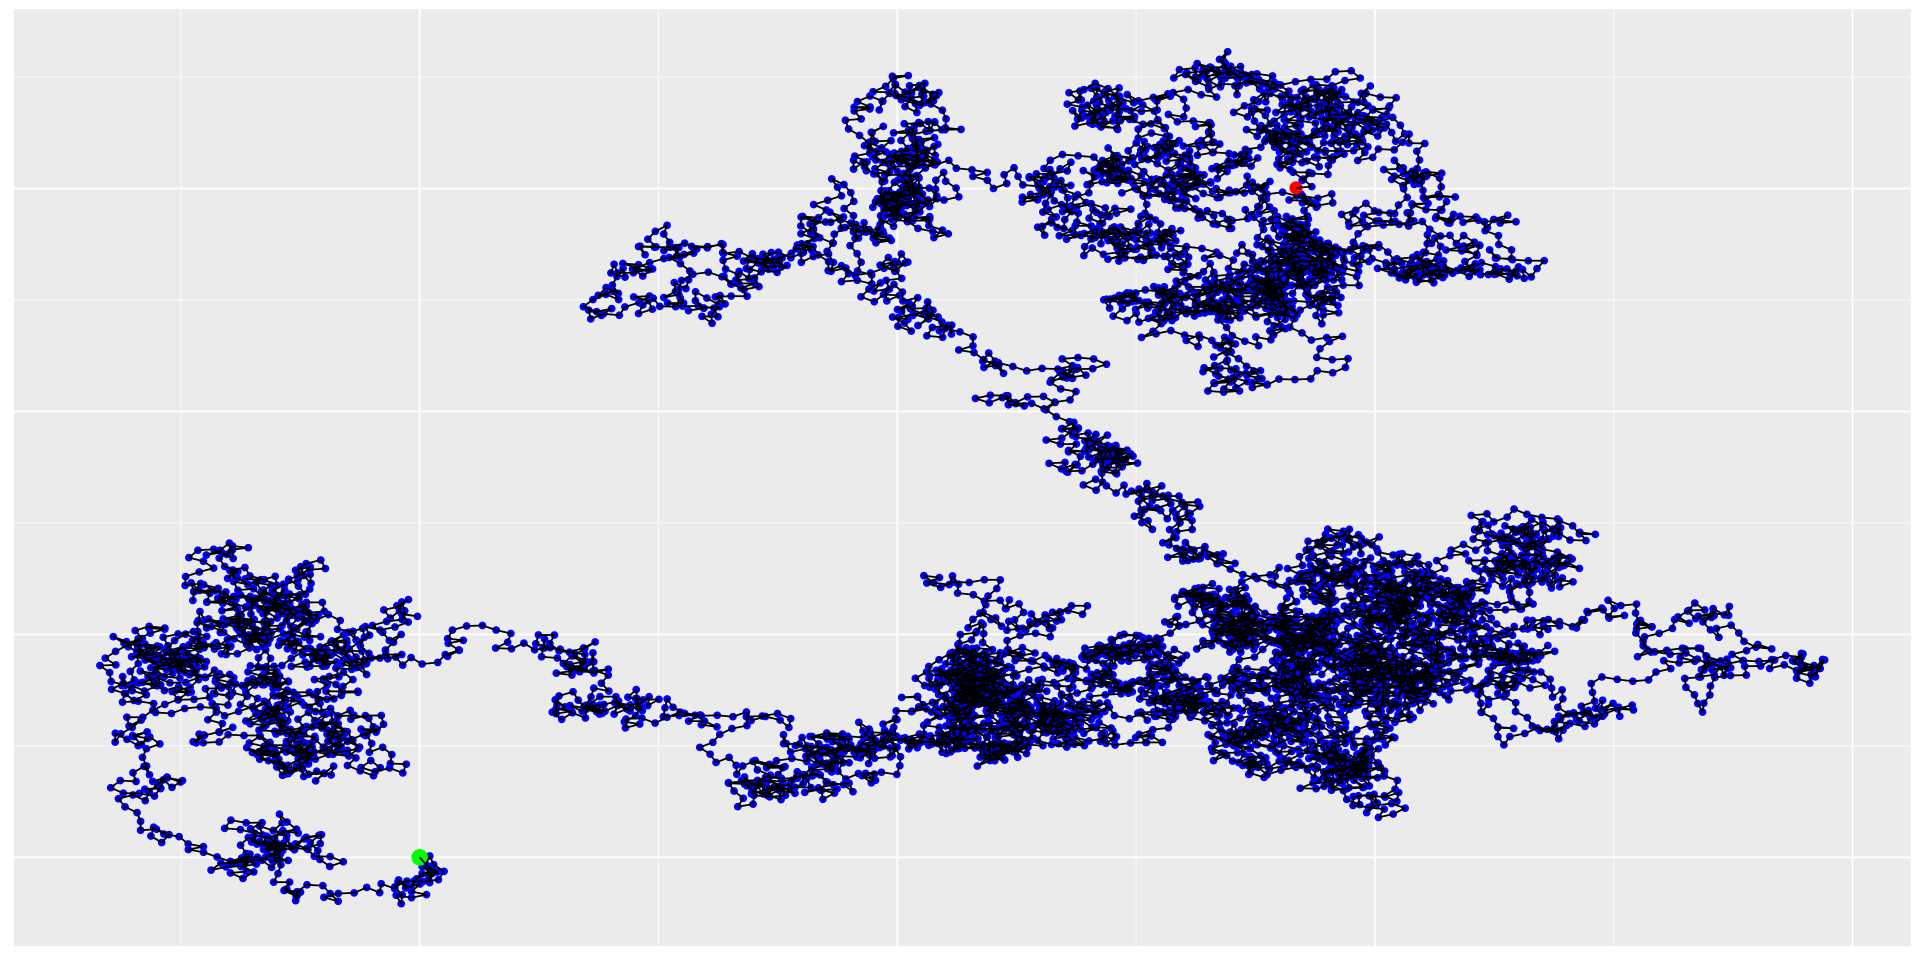

In [16]:
b5 <- ggplot(df%>%filter(run == 1),aes(x=Rx,y=Ry))+
    geom_point(color="blue") +
    geom_point(df%>%filter(step == 0),mapping=aes(x=Rx,y=Rx), size=4, color="green") +
    geom_point(df%>%filter(step == max(step)),mapping=aes(x=Rx,y=Ry), size=3, color="red") +
    geom_path() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank())
b5
